**<center><font color='#023F7C' size="6.5"> </font>** <br>

<font color=#023F7C size=7>**Hi!ckathon #5 - AI & Sustainability**</font> <br>

</center>

<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

<font color="#023F7C">**Author**:</font> **Groupe 19** <br>


## 
<div style="background: linear-gradient(to right, #34490F, #000000); padding: 15px;">
    <h4 style="color: white;"> Group members here: <br>
Group number: 19 <br>
Group members: Gabriel FRANCOIS, Mohamed Amine BESBES, Robin CLAIR SARIC, Yassine MKAOUAR, Zakaria AKIL, Quentin MARRET</h4>
</div>

---
---

This notebook gives you the path to load the train and test datasets of the Hi!ckathon #5. <br>
*<u>Please copy this notebook in the /shared_storage folder</u> since you don't read write access to the /water_shortage_prediction folder* 

Please fill out your group number and add your group members here: <br>
*Group number*: 19 <br>
*Group members*: Gabriel FRANCOIS, Mohamed Amine BESBES, Robin CLAIR SARIC, Yassine MKAOUAR, Zakaria AKIL, Quentin MARRET

We were provided a huge amount of data, and it was crucial to go through feature engineering in order to keep only features and measures that are relevant for our task and create some features that we believe may help. Here are the features that we used for our training:

**Target Variable:**

- piezo_groundwater_level_category

---

**Time Features:**

- date
- year
- month
- day

---

**Piezometry Features (Most Critical):**

- piezo_station_altitude
- piezo_station_investigation_depth
- piezo_status
- piezo_qualification
- piezo_station_longitude
- piezo_station_latitude

---

**Hydrology Features:**

- hydro_observation_result_elab (water flow rate)
- hydro_qualification_code
- hydro_latitude
- hydro_longitude

---

**Meteorology Features:**

- meteo_rain_height
- meteo_temperature_avg
- meteo_evapotranspiration_Monteith
- meteo_humidity_avg
- meteo_wind_speed_avg_10m

---

**Withdrawal Features:**

- prelev_volume_0 (largest water withdrawal)
- prelev_volume_1 (second largest withdrawal)
- prelev_volume_2

---

**Distance Features:**

- distance_piezo_meteo
- distance_piezo_hydro
- distance_piezo_prelev0
- distance_piezo_prelev1
- distance_piezo_prelev2

---

**Economic/Demographic Features:**

- insee_pop_commune
- insee_%_agri
- insee_%_ind
- insee_med_living_level
- insee_%_const


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [98]:
X_train = pd.read_csv('X_train_Hi5.csv', low_memory=False)
X_test = pd.read_csv('X_test_Hi5.csv', low_memory=False)

y_test_submission = pd.read_csv('y_test_submission_example_Hi5.csv')

In [99]:
X_train.set_index('row_index', inplace=True)
X_test.set_index('row_index', inplace=True)

X_train['date'] = pd.to_datetime(X_train['meteo_date'])
X_test['date'] = pd.to_datetime(X_test['meteo_date'])


X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day


In [100]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    radius = 6371  # Radius of Earth in kilometers
    return radius * c

# add distance0 distance1 distance2 entre station piezo et station prelevement 
X_train['distance_piezo_prelev0'] = haversine(X_train['prelev_longitude_0'], X_train['prelev_latitude_0'], X_train['piezo_station_longitude'], X_train['piezo_station_latitude'])
X_train['distance_piezo_prelev1'] = haversine(X_train['prelev_longitude_1'], X_train['prelev_latitude_1'], X_train['piezo_station_longitude'], X_train['piezo_station_latitude'])
X_train['distance_piezo_prelev2'] = haversine(X_train['prelev_longitude_2'], X_train['prelev_latitude_2'], X_train['piezo_station_longitude'], X_train['piezo_station_latitude'])

X_test['distance_piezo_prelev0'] = haversine(X_test['prelev_longitude_0'], X_test['prelev_latitude_0'], X_test['piezo_station_longitude'], X_test['piezo_station_latitude'])
X_test['distance_piezo_prelev1'] = haversine(X_test['prelev_longitude_1'], X_test['prelev_latitude_1'], X_test['piezo_station_longitude'], X_test['piezo_station_latitude'])
X_test['distance_piezo_prelev2'] = haversine(X_test['prelev_longitude_2'], X_test['prelev_latitude_2'], X_test['piezo_station_longitude'], X_test['piezo_station_latitude'])

In [101]:
selected_features = [
    'piezo_groundwater_level_category', # the target
    
    #time features
    'date',
    'year',
    'month',
    'day',

    # Piezometry Features
    'piezo_station_altitude', 
    'piezo_station_investigation_depth',
    'piezo_status',
    'piezo_qualification',
    'piezo_station_longitude',
    'piezo_station_latitude',
    
    # Hydrology Features
    'hydro_observation_result_elab',
    'hydro_qualification_code',
    'hydro_latitude',
    'hydro_longitude',
    
    # Meteorology Features
    'meteo_rain_height',
    'meteo_temperature_avg',
    'meteo_evapotranspiration_Monteith',
    'meteo_humidity_avg',
    'meteo_wind_speed_avg_10m',
    
    # Withdrawal Features
    'prelev_volume_0',
    'prelev_volume_1',
    'prelev_volume_2',
    
    # Distance Features
    'distance_piezo_meteo',
    'distance_piezo_hydro',
    'distance_piezo_prelev0',
    'distance_piezo_prelev1',
    'distance_piezo_prelev2',
    
    # Economic/Demographic Features
    'insee_pop_commune',
    'insee_%_agri',
    'insee_%_ind',
    'insee_med_living_level',
    'insee_%_const'
]

In [102]:
X_train = X_train[selected_features]
X_test = X_test[selected_features[1:]]

In [103]:
y_train = X_train['piezo_groundwater_level_category']
X_train = X_train.drop(columns=['piezo_groundwater_level_category'])

In [104]:
print(X_train.shape),print(y_train.shape)

print(X_test.shape)



(2830316, 32)
(2830316,)
(611208, 32)


    - Imputing : 

In [105]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identifiez les types de colonnes
num_cols = X_train.select_dtypes(include=['float64', 'int64', 'int32', 'float32']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns


# impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

# impute numerical columns with the median

num_imputer = SimpleImputer(strategy='mean')


# 2. Créez les transformateurs

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_cols),
        ('cat', cat_imputer, cat_cols)
    ])

# 3. Créez le pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

# 4. Appliquez le pipeline
X_train_imputed = pipe.fit_transform(X_train)
X_test_imputed = pipe.transform(X_test)


X_train = pd.DataFrame(X_train_imputed, columns=num_cols.append(cat_cols))
X_test = pd.DataFrame(X_test_imputed, columns=num_cols.append(cat_cols))


In [106]:
print(X_train.shape),print(y_train.shape)
print(X_test.shape)


(2830316, 31)
(2830316,)
(611208, 31)


We removed the column date ! 

    - One hot encoding

In [108]:
numeric_columns = [
    "piezo_station_altitude", 
    "piezo_station_investigation_depth",
    "hydro_latitude",
    'piezo_station_longitude',
    'piezo_station_latitude',
    "hydro_longitude", 
    "meteo_rain_height",
    "meteo_temperature_avg", 
    "meteo_evapotranspiration_Monteith", 
    "meteo_humidity_avg",
    "meteo_wind_speed_avg_10m", 
    "hydro_observation_result_elab",
    "prelev_volume_0", 
    "prelev_volume_1", 
    "prelev_volume_2", 
    "distance_piezo_meteo", 
    "distance_piezo_hydro", 
    "distance_piezo_prelev0",
    "distance_piezo_prelev1", 
    "distance_piezo_prelev2", 
    "insee_pop_commune", 
    "insee_%_agri", 
    "insee_%_ind", 
    "insee_med_living_level",
    "insee_%_const"

]

# Convert columns to float64
for col in numeric_columns:
    if col in X_train.columns:  # Check if the column exists in the DataFrame
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')


In [109]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
categorical_columns

Index(['year', 'month', 'day', 'hydro_qualification_code', 'piezo_status',
       'piezo_qualification'],
      dtype='object')

In [110]:
# See number of unique values in each categorical column
for col in categorical_columns:
    print(f'{col}: {X_train[col].nunique()}')

# Drop columns with high cardinality


year: 4
month: 12
day: 31
hydro_qualification_code: 3
piezo_status: 4
piezo_qualification: 4


In [111]:
# get dummies for categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Verify the conversion
print(X_train.shape)
print(X_test.shape)

(2830316, 77)
(611208, 67)


In [112]:
# align the dataframes in terms of columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

print(X_train.shape)
print(X_test.shape)



(2830316, 67)
(611208, 67)


In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2830316, 67)
(2830316,)
(611208, 67)


In [115]:
# transform true et false en 1 et 0 en X_train et X_test

X_train = X_train.replace({True: 1, False: 0})
X_test = X_test.replace({True: 1, False: 0})


/tmp/ipykernel_2677616/312458725.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace({True: 1, False: 0})
/tmp/ipykernel_2677616/312458725.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace({True: 1, False: 0})


In [48]:
# Splitting the dataset into the Training set and validation set but without shuffling the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=False)


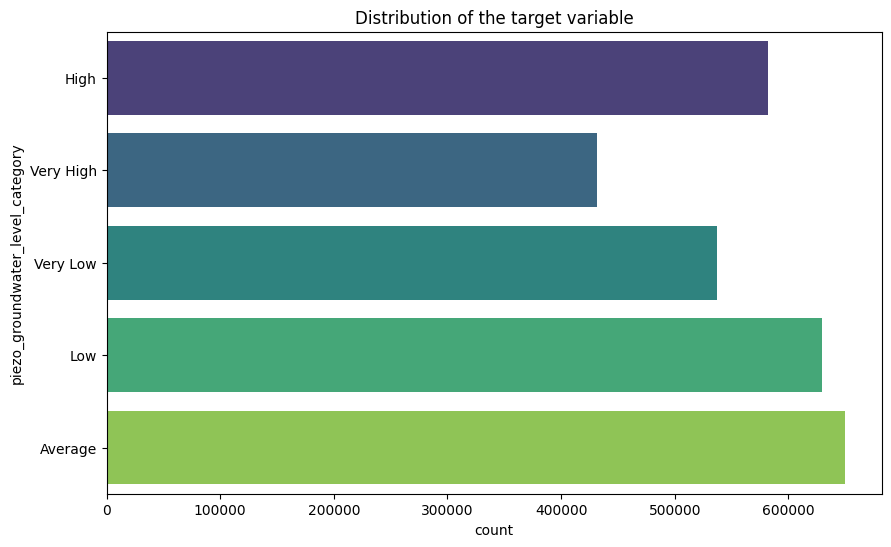

In [116]:
# representer y_train.value_counts() + y_val.value_counts() en histogramme pour voir si les classes sont equilibrées
plt.figure(figsize=(10, 6))
sns.countplot(y=y_train, palette='viridis', hue= y_train)
plt.title('Distribution of the target variable')
plt.show()


    - RandomSearch 

    - Training :

In [23]:
import scipy.sparse as sp

In [ ]:
def level_to_int(level):
    if level == 'Very Low':
        return 0
    elif level == 'Low':
        return 1
    elif level == 'Average':
        return 2
    elif level == 'High':
        return 3
    elif level == 'Very High':
        return 4
    else:
        return level


y_train = y_train.apply(level_to_int)
#y_val = y_val.apply(level_to_int)


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)


params = {
    'objective': 'multi:softmax',
    'num_class': 5,   # the number of classes that exist in this datset
    'max_depth': 7,   # the maximum depth of each tree
    'eta': 0.5,       # learning rate
    'subsample': 0.8, # the fraction of samples to be used for fitting the individual base learners
    'colsample_bytree': 0.8, # the fraction of columns to be subsampled
    'eval_metric': ['merror', 'auc'], # the evaluation metric for the validation data
    'tree_method': 'hist',   # the method used to construct the trees. It's faster than 'auto' and 'exact'
    'device': 'cuda',        # Specify GPU device
}

watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 2500

evals_result = {}
bst = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=10, evals_result= evals_result)

/home/infres/zakil-22/HiParis/venvHiParis/lib/python3.12/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-merror:0.66988	train-auc:0.65250
[1]	train-merror:0.63598	train-auc:0.68193
[2]	train-merror:0.61265	train-auc:0.70625
[3]	train-merror:0.59383	train-auc:0.72167
[4]	train-merror:0.57629	train-auc:0.73732
[5]	train-merror:0.56345	train-auc:0.74809
[6]	train-merror:0.55106	train-auc:0.75719
[7]	train-merror:0.54142	train-auc:0.76506
[8]	train-merror:0.52845	train-auc:0.77394
[9]	train-merror:0.51762	train-auc:0.78128
[10]	train-merror:0.51117	train-auc:0.78576
[11]	train-merror:0.50640	train-auc:0.78954
[12]	train-merror:0.50011	train-auc:0.79427
[13]	train-merror:0.49518	train-auc:0.79838
[14]	train-merror:0.49225	train-auc:0.80131
[15]	train-merror:0.48839	train-auc:0.80455
[16]	train-merror:0.48475	train-auc:0.80721
[17]	train-merror:0.47956	train-auc:0.81072
[18]	train-merror:0.47394	train-auc:0.81456
[19]	train-merror:0.46990	train-auc:0.81732
[20]	train-merror:0.46537	train-auc:0.82094
[21]	train-merror:0.46214	train-auc:0.82319
[22]	train-merror:0.45851	train-auc:0.8259

    - Evaluation:

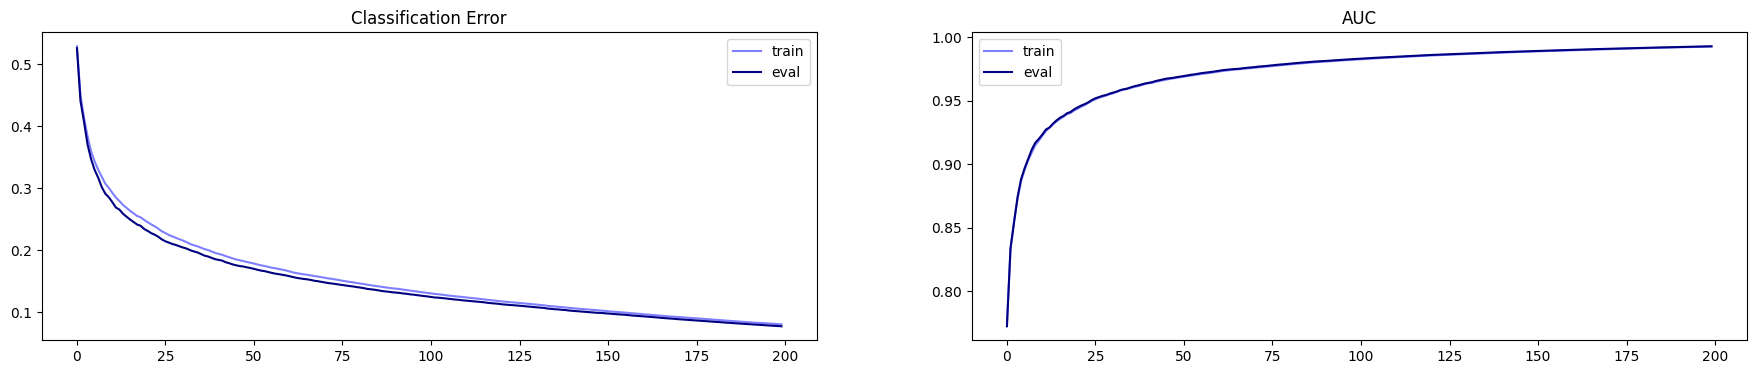

In [92]:
import matplotlib.pyplot as plt

# subplots for the evaluation metrics
fig, ax = plt.subplots(1, 2, figsize=(22, 4))

# plot the classification error
ax[0].plot(evals_result['train']['merror'], label='train' , color='blue', alpha=0.5)
ax[0].plot(evals_result['eval']['merror'], label='eval', color='navy')
ax[0].set_title('Classification Error')
ax[0].legend()

# plot the AUC
ax[1].plot(evals_result['train']['auc'], label='train', color='blue', alpha=0.5)
ax[1].plot(evals_result['eval']['auc'], label='eval', color='navy')
ax[1].set_title('AUC')
ax[1].legend()



    - Prediction for submission

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# CALCULATE WEIGHTED F1 SCORE ON THE VALIDATION SET
y_pred_val = bst.predict(dval)

f1  = f1_score(y_val, y_pred_val, average='weighted')

print(f"Weighted F1 Score on the validation set: {f1}")

In [123]:
y_pred = bst.predict(dtest)

y_pred = pd.Series(y_pred).map({0: 'Very Low', 1: 'Low', 2: 'Average', 3: 'High', 4: 'Very High'})

y_test_submission['piezo_groundwater_level_category'] = y_pred


In [124]:
y_test_submission.to_csv('y_finalfinal.csv', index=False)

## 
<div style="background: linear-gradient(to right, #34490F, #000000); padding: 15px;">
    <h4 style="color: white;"> <strong> End</h4>
</div>

---